# ECE 697AM - Project 2
# Name: Cameron Cebula

This project has two parts. In the first part, you are asked to train and compare classifiers on a given dataset. In the second part, you are asked to find and prepare your own dataset and train suitable classifier.

The API reference for scikit-learn is available at: https://scikit-learn.org/stable/modules/classes.html

# Part 1: Health Dataset

## Part 1-1: Loading Data

This part of the project uses a biomechanical dataset. The dataset is from https://www.kaggle.com/caesarlupum/vertebralcolumndataset Please see that website for a detailed description of the data. The data represents biomechanical features, which could be measured by a embedded medical system, to classify orthopaedic patients according to the condition of their spine. Being able to predict the correct classes based on these biomedical features might help in treating patients or avoiding more invasive tests. 

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join("images", fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

The following shows some basic information about the dataset.

In [2]:
import pandas as pd

bio_data = pd.read_csv(os.path.join("datasets","biomechanical","biomechanical_3C.csv"))
bio_data.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia


In [3]:
bio_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt               310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [4]:
bio_data.describe()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


In [5]:
bio_data.describe(include = 'object')

,class
count,310
unique,3
top,Spondylolisthesis
freq,150


The ML problem we are tyring to solve is to predict the patient class using the numeric feature inputs. How many input features does this dataset provide?

Answer: 6

How many classes are represented in this dataset?

Answer: 3

## Part 1-2: Preparing Data for ML
The following code prepares the data for our ML activites.

In [6]:
X, y = bio_data[["pelvic_incidence", "pelvic_tilt", "lumbar_lordosis_angle", 
                 "sacral_slope", "pelvic_radius", "degree_spondylolisthesis"]], bio_data[["class"]]

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Write the code to perform any necessary transformations on the input and output values. Name the outputs of these transformations X_train_tr and y_train_tr.

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder

num_pipeline = Pipeline([  # sets the pipeline
    ('scaler', StandardScaler())
])

X_train_tr = num_pipeline.fit_transform(X_train) # feeding X training data through the pipeline
y_train_tr = np.ravel(y_train) # turning y_train to a 1-d data type so the LabelEncoder function can manipulate the data.
encoder = LabelEncoder() # Instantiates encoder
y_train_tr = encoder.fit_transform(y_train_tr) # transfroms y_train the 1-d array of y_train 

Print the first few rows of X_train_tr and y_train_tr.

In [9]:
X_train_tr[:8]  # printing 8 values from the transformed x_train

array([[ 0.63294865,  0.50768964,  0.44692756,  0.4488586 , -1.18307392,
         0.06411647],
       [ 0.51156455, -0.18942352,  0.66256327,  0.79334738,  0.43550848,
         0.37020317],
       [-0.59323076, -0.01528651, -1.30700744, -0.75132401,  0.27734871,
        -0.61408236],
       [-1.30464185, -0.78903278, -0.51950982, -1.11000088,  1.41110088,
        -0.3058508 ],
       [ 0.96448544,  2.63721882,  2.365255  , -0.65393538,  1.13580229,
         1.98657685],
       [ 0.44096165,  0.05907199,  0.50112312,  0.52422484, -0.53988201,
         0.20415929],
       [-0.28430751, -2.17293154,  0.2679878 ,  1.19464247, -0.63566818,
         0.1679128 ],
       [-0.69432443, -0.20537298, -0.88149532, -0.74476326,  0.485064  ,
        -0.45604544]])

In [10]:
y_train_tr[:8] # printing 8 values from the transformed y_train

array([2, 2, 1, 1, 2, 2, 2, 0])

## Part 1-3: Train ML Models
In this part, write the code to train three ML models. For each model you should explore the impact of a regularization parameter. The models and the parameter are:

* Logistic Regression Classifier (LogisticRegression): vary parameter C
* Support Vector Machine Classifier (SVC): vary parameter C (you may choose any one kernel function)
* Random Forest Classifier (RandomForestClassifier): vary parameter min_samples_leaf

For each classifier, use a grid search with cross validation (GridSearchCV) to find a good value for the specified parameter. Please name your classifiers sgd_clf, svc_clf, and forest_clf, respectively. For each classifier provide the following:

* Plot a figure showing the grid search score (mean_test_score) vs. the parameter value
* Print the best paramter value
* Print the score (mean_test_score) achieved for the best parameter value
* Print the F1 score for the complete training set (note that sklearn.metrics.f1_score automatically handles multiclass classification)

Note: In order to show evidence that you found a good parameter, you should show a figure that has a "peak" in it. That is, the range of your paramter should be sufficiently large so that it is apparent that the best parameter is indeed an optimum.

You may use the following function for the plot or write your own.

In [11]:
def plot_score(clf, parameter):
    scores_mean = clf.cv_results_[('mean_test_score')]
    plt.style.use('seaborn-v0_8')
    plt.plot(clf.param_grid[parameter], scores_mean, '-o')

    plt.title("Grid Search", fontsize=20, fontweight='normal')
    plt.xlabel(parameter, fontsize=16)
    plt.ylabel('score', fontsize=16)

The function is invoked with plot_score(clf, 'X'), where clf is the grid search classifier and 'X' is the name of the parameter that was used in the grid search.

### Logistic Regression Classifier

Best Parameter: {'C': 1000}
Best Score: 0.879265306122449
F1 Score: 0.8738387377732824


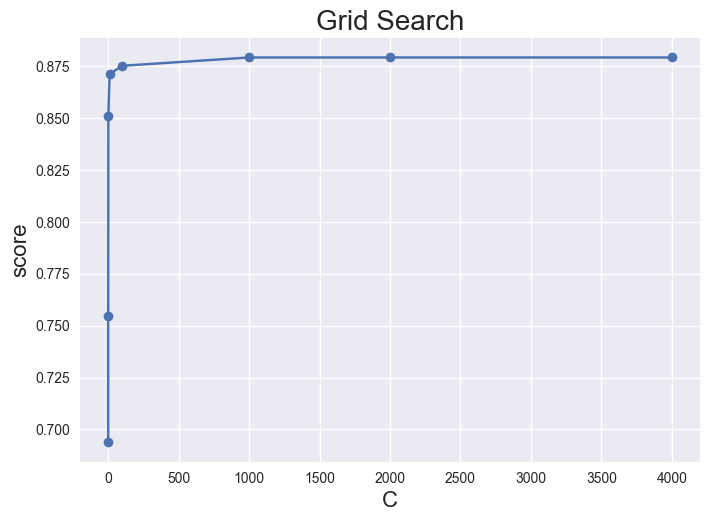

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

log_reg = LogisticRegression(solver="liblinear", random_state=42) # Instantiating Log Reg
param_grid = { 'C': [0.001, 0.01, 1, 10, 100, 1000, 2000, 4000] } # creating a set 
sgd_clf = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')
sgd_clf.fit(X_train_tr, y_train_tr) # Fitting logistic regression with best parameter

C_log = sgd_clf.best_params_ # finding best param
plot_score(sgd_clf, 'C') # plotting with best param

print("Best Parameter:", C_log) # printing the best param
print("Best Score:", sgd_clf.best_score_) # printing best score
y_pred_log = sgd_clf.predict(X_train_tr) # getting the predicted y value for F1 score
print("F1 Score:", f1_score(y_train_tr, y_pred_log, average="weighted")) # finding and printing the F1 score for Logistic Regression

### SVM Classifier

Best Parameter: {'C': 2}
Best Score: 0.830857142857143
F1 Score: 0.8839256193062406


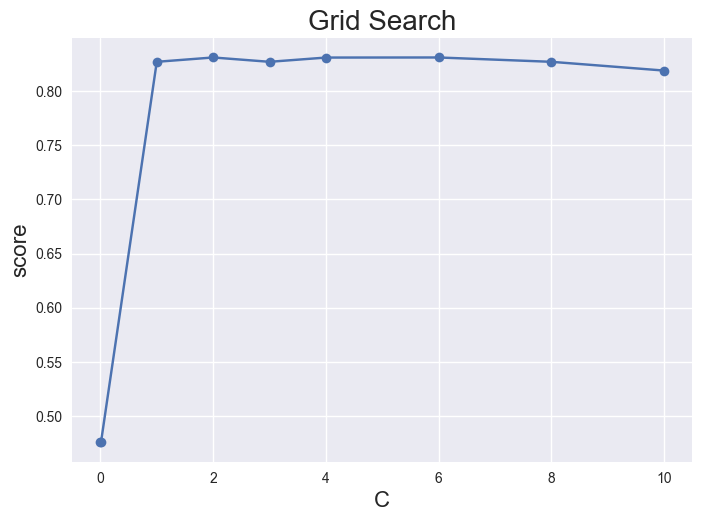

In [13]:
from sklearn.svm import SVC

svc = SVC() # Instantiating SVC
param_grid = { 'C': [0.001, 0.01, 1, 2, 3, 4, 6, 8, 10] } # creating a set 
svc_clf = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy')
svc_clf.fit(X_train_tr, y_train_tr) # Fitting SVC with best parameter
C_svm = svc_clf.best_params_ # finding best param
plot_score(svc_clf, 'C') # plotting with best param
print("Best Parameter:", C_svm) # printing the best param
print("Best Score:", svc_clf.best_score_) # printing best score
y_pred_svc = svc_clf.predict(X_train_tr) # getting the predicted y value for F1 score
print("F1 Score:", f1_score(y_train_tr, y_pred_svc, average="weighted")) # finding and printing the F1 score for SVC

### Random Forest Classifier

Best Parameter: {'min_samples_leaf': 2}
Best Score: 0.850938775510204
F1 Score: 0.9878451922982289


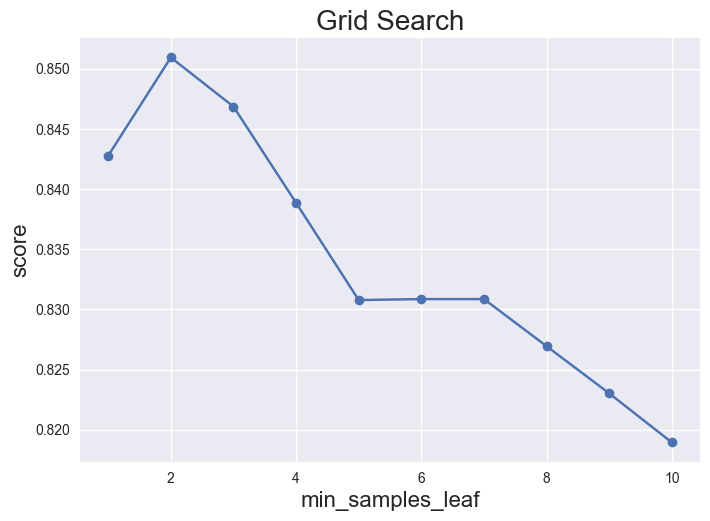

In [14]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=42) # Instantiating Log Reg
param_grid = { 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10] } # creating a set 
forest_clf = GridSearchCV(rfc, param_grid, cv=5, scoring='accuracy')
forest_clf.fit(X_train_tr, y_train_tr) # Fitting logistic regression with best parameter

min_samples = forest_clf.best_params_ # finding best param
plot_score(forest_clf, 'min_samples_leaf') # plotting with best param

print("Best Parameter:", min_samples) # printing the best param
print("Best Score:", forest_clf.best_score_) # printing best score
y_pred_forest = forest_clf.predict(X_train_tr) # getting the predicted y value for F1 score
print("F1 Score:", f1_score(y_train_tr, y_pred_forest, average="weighted")) # finding and printing the F1 score for Forest Classifier

## Part 1-4: Evaluation

In this part, write the code to evaluate the three ML classifiers that you trained previously. Summarize your results in the table.

In [15]:
print("### Log Reg Classifier###")
print("Best Parameter:", C_log) # printing the best param
print("Best Score:", sgd_clf.best_score_) # printing best score
y_pred_log = sgd_clf.predict(X_train_tr) # getting the predicted y value for F1 score
print("F1 Score:", f1_score(y_train_tr, y_pred_log, average="weighted")) # finding and printing the F1 score for Logistic Regression

print("\n\n### SVM Classifier###")
print("Best Parameter:", C_svm) # printing the best param
print("Best Score:", svc_clf.best_score_) # printing best score
y_pred_svc = svc_clf.predict(X_train_tr) # getting the predicted y value for F1 score
print("F1 Score:", f1_score(y_train_tr, y_pred_svc, average="weighted")) # finding and printing the F1 score for SVC

print("\n\n### Random Forest Classifier###")
print("Best Parameter:", min_samples) # printing the best param
print("Best Score:", forest_clf.best_score_) # printing best score
y_pred_forest = forest_clf.predict(X_train_tr) # getting the predicted y value for F1 score
print("F1 Score:", f1_score(y_train_tr, y_pred_forest, average="weighted")) # finding and printing the F1 score for Forest Classifier


### Log Reg Classifier###
Best Parameter: {'C': 1000}
Best Score: 0.879265306122449
F1 Score: 0.8738387377732824


### SVM Classifier###
Best Parameter: {'C': 2}
Best Score: 0.830857142857143
F1 Score: 0.8839256193062406


### Random Forest Classifier###
Best Parameter: {'min_samples_leaf': 2}
Best Score: 0.850938775510204
F1 Score: 0.9878451922982289


Provide a summary of your results in this table:

| ML algorithm                       | best parameter       | training dataset F1 score | test dataset F1 score |
| ---------------------------------- | -------------------- | ------------------------- |---------------------- |
| Logistic Regression Classifier     |     1000             |          0.87             |           0.88          |
| Support Vector Machine Classifier  |       2              |          0.88             |           0.83         |
| Random Forest Classifier           |       2              |          0.99             |           0.85          |


Provide a brief discussion of your results (1-2 sentences for each classifier):

The logistic regression classifier is the most accurate classifier having an accuracy with the best parameters .03 more then the second best. The F1 score is also not bad being the 2nd option, having a low f1 score and high accuracy means this classifier's precision and/or recall is lower then the best option.

The SVM Classifier is the worst performing as its accuracy is the lowest and an F1 Score about tied with the logistic regression classifier.

The Random Forest Classifier is the best performing in most circumstances as its accuracy is relatively good being 3% lower then the Logistic Regression Classifier and has an F1 Score of 0.99 being close to perfect, with perfect being 1.0. 

# Part 2: Your Dataset
## Part 2-1: Find and Perpare Dataset
In this part of the project you are asked for find your own suitable dataset for training a classifier or a regressor. The requirements for the dataset are:

* The dataset must be available on a public website (e.g., https://www.kaggle.com/datasets, https://archive.ics.uci.edu/ml/, etc.).
* The dataset must be suitable for a classification task (binary classification or multiclass classification) or for a regression task. For classification, class labels need to be part of the dataset already. For regression, a numeric value needs to be available for estimation.
* The dataset must contain more than 100 instances and no more than 10,000-100,000 instances.
* The dataset should have a handful (i.e., not hundreds) of features. Do not use datasets with images or time series.

What is the URL to the dataset of your choice? 

Answer: https://www.kaggle.com/datasets/hassaneskikri/online-retail-customer-churn-dataset

Provide a brief description of the dataset: 

Answer: The dataset I chose takes customer demographics, satisfaction levels, spending behavior, and if the customer stopped using the service.

Are you using this dataset for classification or for regression?

Answer: Classification

Describe the classification task or regression task:

Answer: Determine if a customer is going to churn based on their behavior and demographic.

To prepare the dataset, please save the necessary data in a .csv file. What is the name of your data file? 

Answer: online_retail_customer_churn.csv

## Part 2-2: Train ML System
Write the code to load the data, prepare the data for your ML task, set up an ML system with an algorithm of your choice, and train the ML system. Note that you may drop features from the dataset if you do not want to use them. During training, explore one parameter to find a good choice for that parameter. Repeat this process for at least one additional ML system that uses a different algorithm.

In [16]:
customer_data = pd.read_csv(os.path.join("datasets","customer_churn","online_retail_customer_churn.csv"))
customer_data.head(5)

,Customer_ID,Age,Gender,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago,Email_Opt_In,Promotion_Response,Target_Churn
0,1,62,Other,45.15,5892.58,5,22,453.80,2,0,3,129,True,Responded,True
1,2,65,Male,79.51,9025.47,13,77,22.90,2,2,3,227,False,Responded,False
2,3,18,Male,29.19,618.83,13,71,50.53,5,2,2,283,False,Responded,True
3,4,21,Other,79.63,9110.30,3,33,411.83,5,3,5,226,True,Ignored,True
4,5,21,Other,77.66,5390.88,15,43,101.19,3,0,5,242,False,Unsubscribed,False


In [17]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Customer_ID                 1000 non-null   int64  
 1   Age                         1000 non-null   int64  
 2   Gender                      1000 non-null   object 
 3   Annual_Income               1000 non-null   float64
 4   Total_Spend                 1000 non-null   float64
 5   Years_as_Customer           1000 non-null   int64  
 6   Num_of_Purchases            1000 non-null   int64  
 7   Average_Transaction_Amount  1000 non-null   float64
 8   Num_of_Returns              1000 non-null   int64  
 9   Num_of_Support_Contacts     1000 non-null   int64  
 10  Satisfaction_Score          1000 non-null   int64  
 11  Last_Purchase_Days_Ago      1000 non-null   int64  
 12  Email_Opt_In                1000 non-null   bool   
 13  Promotion_Response          1000 n

In [18]:
customer_data.describe()

,Customer_ID,Age,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,43.267000,111.962960,5080.79265,9.727000,49.456000,266.876530,4.612000,1.934000,2.974000,182.890000
std,288.819436,15.242311,52.844111,2862.12335,5.536346,28.543595,145.873445,2.896869,1.402716,1.391855,104.391319
min,1.000000,18.000000,20.010000,108.94000,1.000000,1.000000,10.460000,0.000000,0.000000,1.000000,1.000000
25%,250.750000,30.000000,67.800000,2678.67500,5.000000,25.000000,139.682500,2.000000,1.000000,2.000000,93.000000
50%,500.500000,43.000000,114.140000,4986.19500,9.000000,49.000000,270.100000,5.000000,2.000000,3.000000,180.500000
75%,750.250000,56.000000,158.452500,7606.47000,14.000000,74.000000,401.602500,7.000000,3.000000,4.000000,274.000000
max,1000.000000,69.000000,199.730000,9999.64000,19.000000,99.000000,499.570000,9.000000,4.000000,5.000000,364.000000


In [19]:
customer_data.describe(include = "object")

,Gender,Promotion_Response
count,1000,1000
unique,3,3
top,Female,Unsubscribed
freq,342,361


In [20]:
# Dropped customer ID as it should have no effect on target_churn
X, y = customer_data[["Age", "Annual_Income", "Total_Spend", "Years_as_Customer", "Num_of_Purchases", "Average_Transaction_Amount", "Num_of_Returns",
                      "Num_of_Support_Contacts", "Satisfaction_Score", "Last_Purchase_Days_Ago", 
                      "Email_Opt_In", "Promotion_Response"]], customer_data[["Target_Churn"]] # setting features and dependent variable

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
import numpy as np


# Identifying numerical and categorical columns
numerical_cols = ["Age", "Annual_Income", "Total_Spend", "Years_as_Customer", 
                  "Num_of_Purchases", "Average_Transaction_Amount", "Num_of_Returns",
                  "Num_of_Support_Contacts", "Satisfaction_Score", 
                  "Last_Purchase_Days_Ago", "Email_Opt_In"] #All numerical Data
categorical_cols = ["Promotion_Response"]  # All categorical data

preprocessor = ColumnTransformer( # Defining the preprocessing for numerical and categorical data
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

X_train_tr = pipeline.fit_transform(X_train) # Using pipeline on X_train

y_train_tr = np.ravel(y_train)  # Turning y_train to the correct dimensions
encoder = LabelEncoder()  # Instantiate the encoder
y_train_tr = encoder.fit_transform(y_train_tr)  # Transform y_train

Best Parameter: {'C': 1}


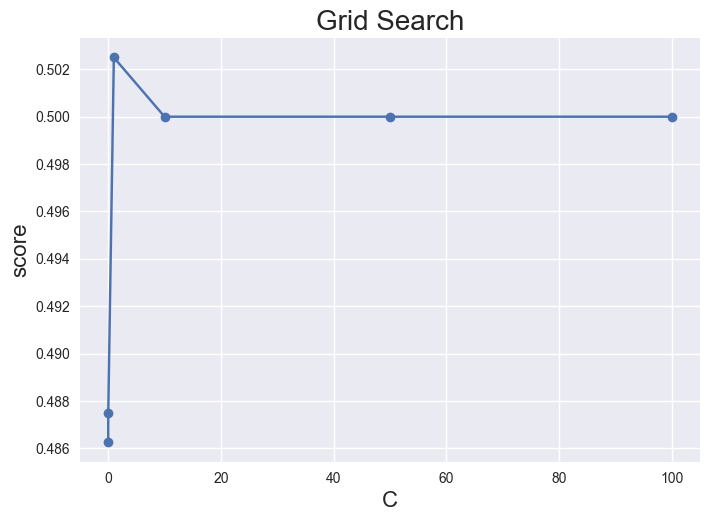

In [23]:
log_reg = LogisticRegression(solver="liblinear", random_state=42) # Instantiating Log Reg
param_grid = { 'C': [0.001, 0.01, 1, 10, 50, 100] } # creating a set 
sgd_clf = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')
sgd_clf.fit(X_train_tr, y_train_tr) # Fitting logistic regression with best parameter

C_log = sgd_clf.best_params_ # finding best param
plot_score(sgd_clf, 'C') # plotting with best param
print("Best Parameter:", C_log) # printing the best param
y_pred_log = sgd_clf.predict(X_train_tr) # getting the predicted y value for F1 score

Best Parameter: {'min_samples_leaf': 11}


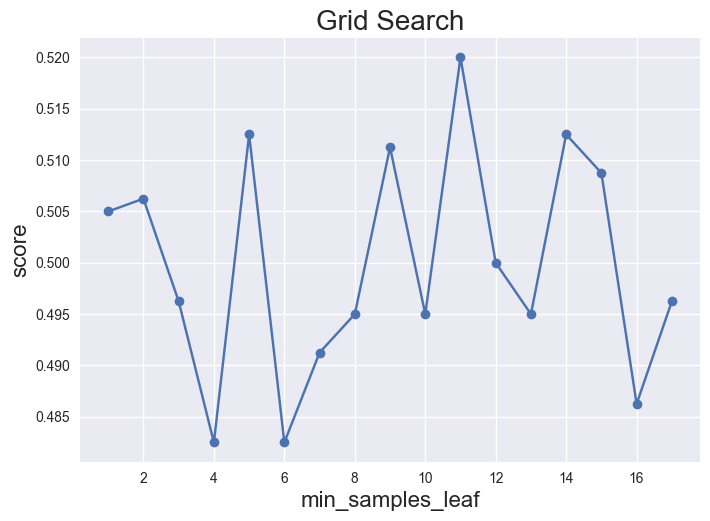

In [24]:
rfc = RandomForestClassifier(random_state=42) # Instantiating Log Reg
param_grid = { 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17] } # creating a set 
forest_clf = GridSearchCV(rfc, param_grid, cv=5, scoring='accuracy')
forest_clf.fit(X_train_tr, y_train_tr) # Fitting logistic regression with best parameter

min_samples = forest_clf.best_params_ # finding best param
plot_score(forest_clf, 'min_samples_leaf') # plotting with best param
y_pred_forest = forest_clf.predict(X_train_tr) # getting the predicted y value for F1 score
print("Best Parameter:", min_samples) # printing the best param

Which of the ML systems you tried out will you use for the final evaluation? Why?

I chose the Random Forest Classifier because it was the best performing classifier in the first part so thought it would also be decent to use in this stage of the lab. 

## Part 2-3: Evaluate ML System
Write the code to evaluate your ML system.

In [26]:
print("Best Score:", forest_clf.best_score_) # printing best score
print("F1 Score:", f1_score(y_train_tr, y_pred_forest, average="weighted")) # finding and printing the F1 score for Forest Classifier

Best Score: 0.5199999999999999
F1 Score: 0.8725798517611103


Write a brief summary about the ML system that you created for your dataset. What worked well and what would you improve in the future?

For the dataset I seleceted, my system starts by uploading the dataset, and then prints key information for the viewer to understand the data. I then dropped the customer_id column because it has no effect on customer churn. I then added the rest of the data into two arrays (X) containing the features and (y) containing the dependent variable. Then the system seperate the data into test and train and gets fed to the pipeline which encodes strings and scales numerical data. The transformed data is fed to the Random Forest Classifier and Logistic Regression Classifier both using GridCV to find their best parameters. The ML System was then trained with the best parameters in place and Random Forest Classifier was evaluated. 

The features seem to have not much effect on customer churn as the accuracy was very low but had a great F1 score.

In the future I would have tried several other ML systems and test them in the moment to see the best fit for the data, instead of blindly choosing Random Forest Classifier based on another's data performance. Also I saw Kaggle gives used projects and ratings of the data before you use it for your own purposes, I would like to look more into these ratings before choosing a dataset. 